In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import create_session
from sqlalchemy.schema import Table, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

measurement_col = []

columns = inspector.get_columns('measurement')
for c in columns:
    measurement_col.append(c['name'])
    print(c['name'], c["type"])
    
    measurement_col

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# top 5 measurements
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

In [12]:
# last date
session.query(Measurement.date).order_by((Measurement.date.desc())).first()



('2017-08-23')

In [13]:
#today date
print(dt.date.today())
print(dt.date(2017, 8 ,23))

2020-11-09
2017-08-23


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement.date).order_by(Measurement.date.desc()).first
# Calculate the date 1 year ago from the last data point in the database
one_year = dt.date(2017,8,23) -dt.timedelta(days=365)
print(one_year)

2016-08-23


In [15]:
#Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year).all()

precipitation_last_12 = session.query(Measurement.date,Measurement.prcp).\
              filter(func.datetime(Measurement.date) >= one_year).\
                 order_by(Measurement.date).all()
precipitation_last_12

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [16]:
#Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)
df.tail()

precipitation_pd = pd.DataFrame(precipitation_last_12)
precipitation_pd= precipitation_pd.dropna()



In [17]:
#Sort the dataframe by date
precipitation_pd.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# date and pcp top 5
precipitation_pd.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


In [19]:
#count of date and Precipitation
precipitation_pd.count()

date    2021
prcp    2021
dtype: int64

NameError: name 'ax' is not defined

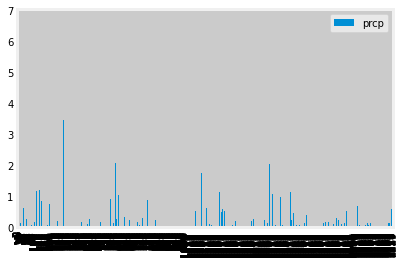

In [20]:
# Create Date vs. Prcp Plot scatter plot
#plt.figure(precip_sort['date'], precip_sort["prcp"], facecolor = "lightblue", edgecolor = "black")
precipitation_pd.plot(kind='bar', stacked=True);
#precipitation_pd.date.set_index('date',inplace=True,sort_columns=True,use_index=True, legend=True,grid=True, color='g')

#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# Set title/
plt.title("Date vs Precipitation")
# Set x axis label
#FIX DATES
plt.xlabel("Date")
# Set y axis label
plt.ylabel("Precipitation")
# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 1.5)

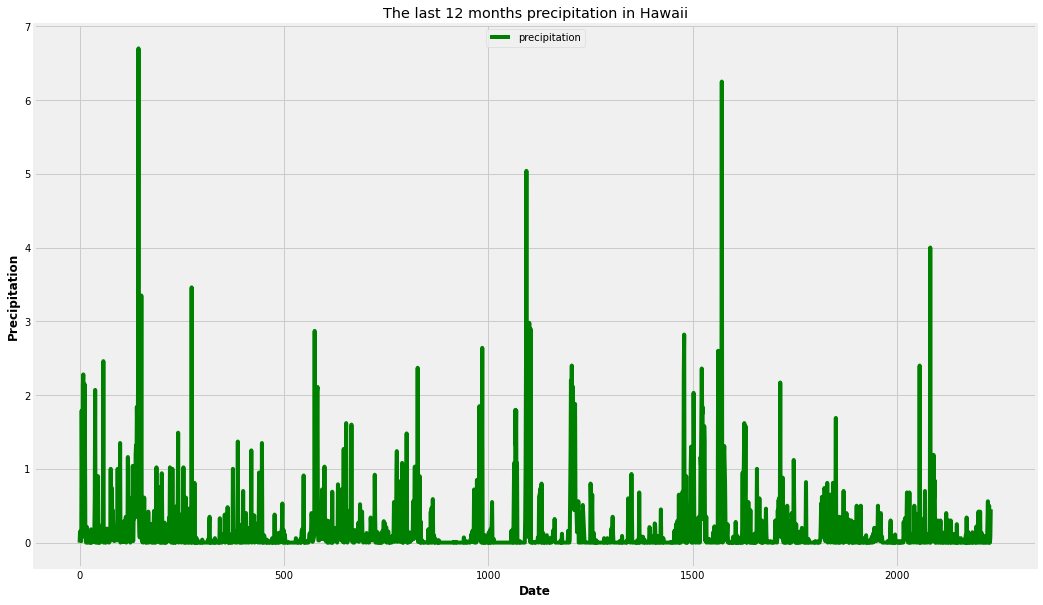

In [21]:
#Use Pandas Plotting with Matplotlib to plot the data
precipitation_pd.plot(figsize = (16, 10), sort_columns=True,use_index=True, legend=True,grid=True, color='g')

plt.ylabel('Precipitation', weight='bold')
plt.xlabel('Date', weight='bold')
label_t = plt.legend(loc='upper center')
label_t.get_texts()[0].set_text('precipitation')
# #set ticks every week
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# #set major ticks format
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.title("The last 12 months precipitation in Hawaii")
plt.show()


In [22]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station, func.sum(Measurement.station))\
.group_by(Measurement.station).all()

stationcount = session.query(Measurement).distinct(Measurement.station).group_by(Measurement.station).count()
stationcount

9

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
#print('Total Station Number:',Measurement.station)
sel = [Measurement.station, func.count(Measurement.tobs)]
query = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc())
q_df = pd.DataFrame(query, columns=['station_id','total_count']).set_index('station_id')
store_station=q_df.index[0]
q_df

,total_count
station_id,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [24]:
# store min,max and avg for the active station
sel= [func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)]
query = session.query(*sel).\
     filter(Measurement.station==store_station).all()
q_df=pd.DataFrame(query,columns=['low','hgh','avg'])
q_df

,low,hgh,avg
0,54.0,85.0,71.663781


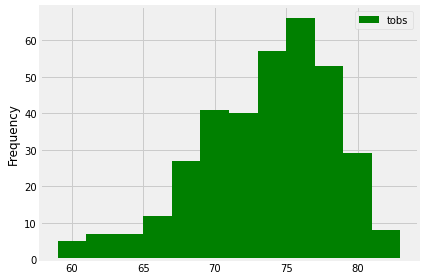

<Figure size 432x288 with 0 Axes>

In [25]:
#histogram of Tobs
sel=[Measurement.date, Measurement.tobs]
query = session.query(*sel).\
     filter(Measurement.station==store_station).\
     filter(func.strftime(Measurement.date)>=one_year).\
     group_by(Measurement.date).\
     order_by(func.count(Measurement.tobs).desc())
q_df=pd.DataFrame(query[:][:],columns=['date', 'tobs'])
q_df.plot.hist(bins=12, color='green')
plt.tight_layout()
plt.show()
plt.savefig('stat_temp.png')

## Bonus Challenge Assignment

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
prev_year_start = dt.date(2018, 1, 1) - dt.timedelta(days=365)
prev_year_end = dt.date(2018, 1, 7) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

62.0 68.36585365853658 74.0


C:\Users\pasi1\OneDrive\Documents\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


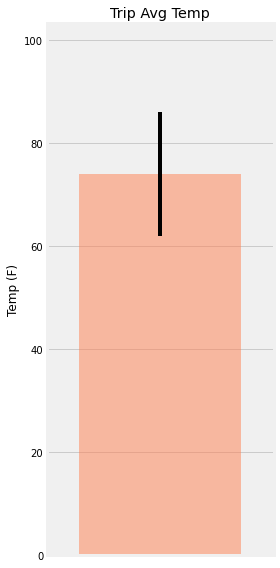

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
# fig.autofmt_xdate()
fig.tight_layout()
fig.show()
plt.savefig('trip_avg_temp.png')

In [40]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2012-01-01'
end_date = '2012-01-07'

sel = [Measurement.station, station.name, station.latitude, 
       station.longitude, station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == station.station,
    func.strftime(Measurement.date) >= start_date,
    func.strftime(Measurement.date) <= end_date).\
    group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc())
q_df=pd.DataFrame(results,columns=['station_id','station_name','total_precip','lat_station','Lng_station','elevation_station']).set_index('station_id')
q_df

,station_name,total_precip,lat_station,Lng_station,elevation_station
station_id,,,,,
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.31
USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.25
USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,0.10
USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.06
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.00
USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00
USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.00
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.00


In [30]:
# Create a query that will calculate the daily normals 
disp# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start = '2018-01-01'
trip_end = '2018-01-07'
# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end, freq='D')
# Stip off the year and save a list of %m-%d strings
trip_month_day = trip_dates.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_month_day:
    normals.append(*daily_normals(date))
    
normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df_trip = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
df_trip['date'] = trip_dates
df_trip.set_index(['date'],inplace=True)
df_trip.head()

,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


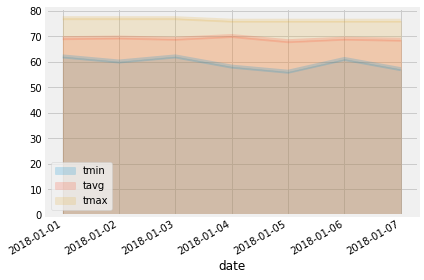

In [33]:
# Plot the daily normals as an area plot with `stacked=False`
df_trip.plot(kind='area', stacked=False, x_compat=True, alpha=.2)
plt.tight_layout()
plt.savefig('area_plot.png')